This notebook is intended to provide an overview of the dataset. For construction of figures found the associated manuscript, see the notebooks covering connectivity, PSP properties, and higher order motifs (convergence and divergence).

All notebooks begin by loading the dataset as a pandas dataframe. Each row of this dataframe represents a tested connection. Each column is a feature of the tested connection.

In [1]:
import pandas as pd
import numpy as np
full_df=pd.read_csv('data/full_df.csv')
print (np.shape(full_df))


(18952, 81)


/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


***the following columns help ID each tested connection***

*exp_id*: the name of the experiment. Corresponding nwb files can found in the associated Dryad dataset. nwb files were generated from Igor packed experiment files (.pxp's) in which data were acquired using MIES. If you are interested in accessing the dataset via these (significantly larger) files, please reach out.

*MP_ID*: an identifier for each photostimulated/presynaptic cell. MP references the "Mark Points" interface used for photostimulation in PrarieView software.

*headstage*: the headstage on which postsynaptic responses were recorded (0-3)

each tested connection will have a unique combination of *exp_id*, *MP_ID*, and *headstage*.

*cnx*: the human-made call of the absence (*no cnx*) or presence (*excitatory* or *inhibitory*) of a postsynaptic response. Recordings from opsin-expressing cells include a number of *direct* connection calls which indicate the presence of a direct stimulus artifact. See corresponding manuscript for more info.

***the following columns describe features of each experiment***

*presynapticCre*: The Cre line driving opsin expression. Full names and further info found in manuscript.

*presynapticEffector*: the transgenic line or virus used to drive opsin expression

*internal*: the internal solution used for recording. The majority of connections used a 'standard' K-gluc based internal for current clamp recordings. A subset of recordings used a Cs-based internal ('Cs'). This was primarily to compare intralaminar Sst to pyramidal cell connectivitiy between L2/3 and L5. These data were reported on in our 2019 biorxiv manuscript. 

*notes*: used to indicate if anything non-standard was done for this experiment. When generating figures and analyses for the manuscript, we exclude any data with such notes.

*date* and *user*: who ran the experiment when

*lateral_orientation* and *angle*: refer to the orientation of the slice relative to the dorsal ventral axis. These values were used when converting stage positions of each cell to anterior/posterior positions and distance from the pia.

In [2]:
##for an overview of these features
id_list=['exp_id', 'MP_ID','headstage','cnx'] 
exp_list=['presynapticCre','presynapticEffector','internal', 'notes', 'date', 'user','lateral_orientation', 'angle']
full_df[id_list+exp_list].head()

,exp_id,MP_ID,headstage,cnx,presynapticCre,presynapticEffector,internal,notes,date,user,lateral_orientation,angle
0,2020_11_20_exp1_TH,Point 11,3,no cnx,Pvalb,ChrimsonR_kv_eyfp_AAV,standard,NaN,11/20/20,TH,1.0,-57.285688
1,2020_11_20_exp1_TH,Point 10,3,no cnx,Pvalb,ChrimsonR_kv_eyfp_AAV,standard,NaN,11/20/20,TH,1.0,-72.812151
2,2020_11_20_exp1_TH,Point 13,3,no cnx,Pvalb,ChrimsonR_kv_eyfp_AAV,standard,NaN,11/20/20,TH,1.0,-70.477701
3,2020_11_20_exp1_TH,Point 12,3,no cnx,Pvalb,ChrimsonR_kv_eyfp_AAV,standard,NaN,11/20/20,TH,1.0,-63.201008
4,2020_11_20_exp1_TH,Point 15,3,no cnx,Pvalb,ChrimsonR_kv_eyfp_AAV,standard,NaN,11/20/20,TH,1.0,-42.922101


***the following columns provide basic info on the postsyanptic/patched cell of each connection***
See manuscript for further info on cell classification.

*post_class* and *post_layer*: the broad neuronal class of the patched cell (*pyramidal* or *interneuron*), and the cortical layer of its soma. 

*post_reporter*: was the patched cell was labeled by the Cre line and expressing opsin? (*positive* or *negative*)

*HS_x*, *HS_y*, *HS_z*: the x,y,z stage/objective coordinates of the postsynaptic cell's soma.

*toPia*, *toWM*, *post_frac*: distance to pia and white matter of the postsynaptic cell's soma (in microns) and the fractional position of the cell from pia to white matter. Values closer to 0 are near the pia.

*post_depth*: the distance of the postsyanptic cell from the surface of the slice (in microns)

*phostostim_as*: some opsin-positive cells were also photostimuluated. If a value is present in this column, it refers to the "MP_ID" of the photostimulus. (e.g. 2.0 corresponds to 'Point 2').


In [3]:
post_pos_list=['post_class', 'post_layer', 'post_reporter','HS_x','HS_y','HS_z','toPia', 'toWM', 
               'post_frac','post_depth','photostim_as']
full_df[id_list+post_pos_list].head()
##note all tested connections from the first 5 rows were from the same postsynaptic cell

,exp_id,MP_ID,headstage,cnx,post_class,post_layer,post_reporter,HS_x,HS_y,HS_z,toPia,toWM,post_frac,post_depth,photostim_as
0,2020_11_20_exp1_TH,Point 11,3,no cnx,interneuron,2,positive,2343.561912,-1910.008839,598.144233,285.0,666.0,0.299685,73.0,2.0
1,2020_11_20_exp1_TH,Point 10,3,no cnx,interneuron,2,positive,2343.561912,-1910.008839,598.144233,285.0,666.0,0.299685,73.0,2.0
2,2020_11_20_exp1_TH,Point 13,3,no cnx,interneuron,2,positive,2343.561912,-1910.008839,598.144233,285.0,666.0,0.299685,73.0,2.0
3,2020_11_20_exp1_TH,Point 12,3,no cnx,interneuron,2,positive,2343.561912,-1910.008839,598.144233,285.0,666.0,0.299685,73.0,2.0
4,2020_11_20_exp1_TH,Point 15,3,no cnx,interneuron,2,positive,2343.561912,-1910.008839,598.144233,285.0,666.0,0.299685,73.0,2.0


***additional patched cell features***

*Ri*, *tau*, *sag*, *rheo*, *peak*, *height*, *FWHM*, *trough*, *updown*, *fi_slope*, *adaptation*, *average_rate*, *rest*: refer to intrinsic physiological features measured from most patched cells.

*Kcluster*: refers to clustering result of K-means clustering, applied to interneurons in the dataset, using the features above. Cluster 0 corresponds to Sst interneurons, 1 corresponds to fast-spiking/Pvalb interneurons, 2 corresponds to VIP interneurons. See Figure 3-figure supplement 1 for more info.

*oneP*: refers to the amplitude of one-photon evoked synaptic responses (in mV). Not reported for opsin-positive patched cells.

*oneP_spike*: indicates cells that spiked in response to one-photon stimulation.

*cnx_to*: a few connections were observed between simultaneously patched cells. Values in this column indicate the headstage of the other patched cell(s) that this cell connected to.

In [4]:
post_feat_list=['Ri','tau','sag','rheo','peak','height','FWHM','trough','updown','fi_slope','adaptation',
                'average_rate','rest','Kcluster','oneP','oneP_spike','cnx_to']
full_df[id_list+post_feat_list].head()

,exp_id,MP_ID,headstage,cnx,Ri,tau,sag,rheo,peak,height,...,trough,updown,fi_slope,adaptation,average_rate,rest,Kcluster,oneP,oneP_spike,cnx_to
0,2020_11_20_exp1_TH,Point 11,3,no cnx,63389486.93,6.161373,0.079382,350.0,23.768749,79.75,...,-55.981251,1.425584,1.000607,0.018885,13.443088,-62.567219,1.0,NaN,1.0,[2]
1,2020_11_20_exp1_TH,Point 10,3,no cnx,63389486.93,6.161373,0.079382,350.0,23.768749,79.75,...,-55.981251,1.425584,1.000607,0.018885,13.443088,-62.567219,1.0,NaN,1.0,[2]
2,2020_11_20_exp1_TH,Point 13,3,no cnx,63389486.93,6.161373,0.079382,350.0,23.768749,79.75,...,-55.981251,1.425584,1.000607,0.018885,13.443088,-62.567219,1.0,NaN,1.0,[2]
3,2020_11_20_exp1_TH,Point 12,3,no cnx,63389486.93,6.161373,0.079382,350.0,23.768749,79.75,...,-55.981251,1.425584,1.000607,0.018885,13.443088,-62.567219,1.0,NaN,1.0,[2]
4,2020_11_20_exp1_TH,Point 15,3,no cnx,63389486.93,6.161373,0.079382,350.0,23.768749,79.75,...,-55.981251,1.425584,1.000607,0.018885,13.443088,-62.567219,1.0,NaN,1.0,[2]


In [5]:
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]

In [ ]:
interneurons=

***location of the photostimulated (presynaptic) cell and distances between pre- and post- cells***

*x_pos*, *y_pos*, *z_pos*: stage/objective position of the photostimulated cell

*pre_depth*: depth of photostimulated cell from the surface of the slice

*x_center*, *y_center*, *z_distance*: offsets between pre and post cells from stage coordinates

*x_rotate*, *y_rotate*: cell locations rotated according to *angle* of the slice so that x corresponds to anterior-posterior axis and y corresponds to dorsal-ventral axis.

*abs_x*, *abs_y*: absolute values of the above measures

*y_pia*, *y_frac*: photostimualted cell distance from the pia and fractional position from pia to white matter.

*x_ap*: anterior posterior offset in which positive values correspond to the presynaptic cell being posterior to the postsynaptic cell.

*min_depth*: the lower value of the presynaptic cell depth (from the surface of the slice) and the postsynaptic cell depth

*xy_dist*, *xyz_dist*: Euclidean distances in 2 or 3 dimensions, respectively

In [46]:
pre_dist_list=['x_pos', 'y_pos', 'z_pos', 'pre_depth','x_center', 'y_center', 'z_distance', 'x_rotate','y_rotate', 
           'y_pia', 'y_frac', 'x_ap', 'abs_x', 'abs_y', 'min_depth', 'xy_dist', 'xyz_dist']
full_df[id_list+pre_dist_list].head()

,exp_id,MP_ID,headstage,cnx,x_pos,y_pos,z_pos,pre_depth,x_center,y_center,...,x_rotate,y_rotate,y_pia,y_frac,x_ap,abs_x,abs_y,min_depth,xy_dist,xyz_dist
0,2020_11_20_exp1_TH,Point 11,3,no cnx,2109.333669,-1742.790930,603.894005,67.250229,-234.228243,167.217910,...,242.141905,-155.537768,440.537768,0.463236,242.141905,242.141905,155.537768,67.250229,287.792806,287.850237
1,2020_11_20_exp1_TH,Point 10,3,no cnx,2124.088626,-1830.140277,603.894005,67.250229,-219.473286,79.868562,...,223.123806,-69.016504,354.016503,0.372257,223.123806,223.123806,69.016504,67.250229,233.554084,233.624849
2,2020_11_20_exp1_TH,Point 13,3,no cnx,2083.363568,-1803.127037,622.194027,48.950206,-260.198344,106.881802,...,265.123809,-94.001404,379.001404,0.398529,265.123809,265.123809,94.001404,48.950206,281.295037,282.321254
3,2020_11_20_exp1_TH,Point 12,3,no cnx,2072.151176,-1755.775292,603.894005,67.250229,-271.410735,154.233547,...,278.643371,-140.746745,425.746745,0.447683,278.643371,278.643371,140.746745,67.250229,312.172668,312.225614
4,2020_11_20_exp1_TH,Point 15,3,no cnx,2131.601431,-1658.413448,622.194027,48.950206,-211.960481,251.595391,...,224.036126,-240.905170,525.905170,0.553002,224.036126,224.036126,240.905170,48.950206,328.979462,329.857361


***quantitative features of tested connections***

features descibed in Table 5 of mansucript. See also Figure 5-figure supplement 2, Figure 6-figure supplement 1

In [47]:
tested_list=['DC_baseline_SD', 'DC_post_peak', 'DC_post_crossings3x', 'DC_post_crossings5x', 'DC_post_peak_time',
           'post_cross_persweep', 'post_cross_persweep_sd', 'avg_peak', 'avg_peak_time', 'SD_peak_time','baseline_SD',
           'sweeps_used']

full_df[id_list+tested_list].head()

,exp_id,MP_ID,headstage,cnx,DC_baseline_SD,DC_post_peak,DC_post_crossings3x,DC_post_crossings5x,DC_post_peak_time,post_cross_persweep,post_cross_persweep_sd,avg_peak,avg_peak_time,SD_peak_time,baseline_SD,sweeps_used
0,2020_11_20_exp1_TH,Point 11,3,no cnx,0.936273,-2.599217,3.0,0.0,24.52,1.0625,0.25,-0.072317,31.24,0.232328,0.020728,"[728, 726, 724, 722, 716, 712, 710, 708, 706, ..."
1,2020_11_20_exp1_TH,Point 10,3,no cnx,0.633728,-1.733724,2.0,0.0,11.32,1.0000,0.00,-0.051467,29.44,0.220602,0.027316,"[768, 767, 766, 765, 764, 763, 762, 761, 760, ..."
2,2020_11_20_exp1_TH,Point 13,3,no cnx,0.830311,-2.739578,0.0,0.0,49.88,1.0000,0.00,-0.252652,31.92,0.392163,0.026739,"[827, 825, 823, 821, 819, 817, 815, 813, 811, ..."
3,2020_11_20_exp1_TH,Point 12,3,no cnx,0.754315,-2.810399,2.0,1.0,25.48,1.0000,0.00,-0.090029,49.68,0.272611,0.015471,"[748, 747, 746, 745, 744, 743, 742, 741, 740, ..."
4,2020_11_20_exp1_TH,Point 15,3,no cnx,0.976372,-3.395537,0.0,0.0,3.92,1.0000,0.00,-0.039006,42.68,0.206081,0.029130,"[848, 847, 846, 845, 844, 843, 842, 841, 840, ..."


***features of identified connections***

*peakOfAvg*: peak of the first detectable PSP in the averaged photostimulus response. (mV)

*avg_by_sweeps*: peak photostimulus responses were measured from each trial and values were averaged. This measure is typically larger than *peakOfAvg*, but closely correlated across connections. (mV)

*CV*: the coefficient of variation (standard deviation/mean) of the per trial peak photostimulus responses.

*rise2080*: the rise time of the synaptic response. (ms)

*halwidth*: FWHM of PSPs, not calculated if multiple PSPs were detected. (ms)

*timeOfPeak*: the average time of the peak of the first PSP from the start of the photostimulus. (ms)

*jitter*: the standard deviation of the time of the first peak across trials. (ms)

*sweeps_PSPprops*: the sweeps used to measure these parameters

In [48]:
cnx_features_list=['peakOfAvg','avg_by_sweeps','CV','rise2080','halfwidth','timeOfPeak','jitter','sweeps_PSPprops']
inh=full_df[full_df.cnx=='inhibitory'] ##subset for identified inhibitory connections
inh[id_list+cnx_features_list].head()

,exp_id,MP_ID,headstage,cnx,peakOfAvg,avg_by_sweeps,CV,rise2080,halfwidth,timeOfPeak,jitter,sweeps_PSPprops
6,2020_11_20_exp1_TH,Point 17,3,inhibitory,-0.205382,-0.309440,0.459838,1.348243,11.878860,14.720000,5.277601,"[850, 854, 858, 862, 866, 870, 874, 882, 886, ..."
13,2020_11_20_exp1_TH,Point 6,3,inhibitory,-0.318955,-0.479710,0.600763,1.502798,9.339700,17.360001,5.129583,"[569, 570, 571, 572, 573, 574, 575, 576, 578, ..."
15,2020_11_20_exp1_TH,Point 3,3,inhibitory,-0.155493,-0.217994,0.474821,1.229653,NaN,7.920000,1.221938,"[470, 472, 474, 476, 478, 480, 482, 484, 486, ..."
18,2020_11_20_exp1_TH,Point 8,3,inhibitory,-0.299355,-0.366710,0.449862,1.307597,13.003001,15.120000,5.403811,"[649, 650, 651, 652, 653, 654, 656, 657, 658, ..."
37,2020_11_20_exp1_TH,Point 6,2,inhibitory,-0.552330,-0.572397,0.253146,1.574405,13.183111,16.200001,1.282519,"[569, 570, 571, 572, 573, 574, 575, 576, 577, ..."


We aimed to collect as much of the data as possible under standardized conditions. To exclude the experiments that explored other conditions we subset the data below.

In [49]:
standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))

(16286, 81)


We can further subset the data to explore connections of interest - such as from somatostatin interneurons to L2/3 pyramdial cells. 

In [32]:
Sst_L23pyr=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.post_class=='pyramidal') & 
                      (standard_df.post_layer==2)]
print (np.shape(Sst_L23pyr))

(1424, 81)


Below is an example of how one can visualize the locations of tested and found connections.

In [33]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'horizontal offset ($\\mu$m)')

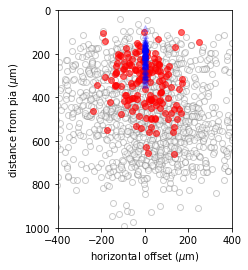

In [40]:
df=Sst_L23pyr
no_cnx=df[df.cnx=='no cnx'] ##tested connections with no response
inh=df[df.cnx=='inhibitory'] ##tested connections with IPSP
post_pia=df.groupby(['exp_id','headstage']).toPia.mean() ##groupby using these columns returns an object containg the position of each postsyanptic cell in the dataset

fig, ax = plt.subplots()

##we first plot the presynaptic cell locations (anterior-posterior vs distance from pia) 
##and color markers according to connection call
ax.scatter(no_cnx['x_ap'], no_cnx['y_pia'], color='grey', alpha=0.4, facecolor='white', marker='o')
ax.scatter(inh['x_ap'], inh['y_pia'], color='red', alpha=0.6,marker='o')

##plot postsynaptic cells
for cell in post_pia:
    ax.scatter(0,cell,color='blue',alpha=0.2,marker='^')
    
##limit plot to region with most tested connections
ax.set_xlim([-400,400])
ax.set_ylim([1000,0]) #setting first value of ylim high orients so that superficial cells are at the top of the plot
ax.set_aspect(aspect='equal',adjustable='box')
ax.set_ylabel(r'distance from pia ($\mu$m)')
ax.set_xlabel(r'horizontal offset ($\mu$m)')

Plots like this are often made when exploring the data. Commonly used functions have been stored in 'opto_utils.py'

In [41]:
import opto_util as opto
Rorb_L23pyr=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.post_class=='pyramidal') & 
                      (standard_df.post_layer==2)]

Text(0.5, 0, 'horizontal offset ($\\mu$m)')

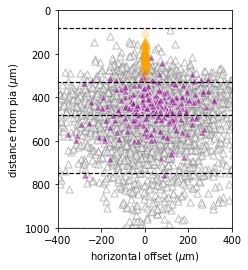

In [43]:
fig, ax = plt.subplots()
opto.graph_map_subplot(ax, Rorb_L23pyr, 'excitatory', 'purple', '^', 'orange', '^')
opto.layer_borders(ax)
ax.set_xlim([-400,400])
ax.set_ylim([1000,0]) #setting first value of ylim high orients so that superficial cells are at the top of the plot
ax.set_aspect(aspect='equal',adjustable='box')
ax.set_ylabel(r'distance from pia ($\mu$m)')
ax.set_xlabel(r'horizontal offset ($\mu$m)')